# Exploratory Data Analysis: Titanic Dataset  
•	ใช้ Pandas, Matplotlib, Seaborn วิเคราะห์ข้อมูลการรอดชีวิตของผู้โดยสาร  
•	ฝึกการทำ Data Cleaning, Missing Value Handling, และ Insight Discovery


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Load dataset

In [5]:
titannic_train_path = "data/train.csv"
titanic_test_path = "data/test.csv"

In [6]:
df = pd.read_csv(titannic_train_path)
df_test = pd.read_csv(titanic_test_path)

## สำรวจข้อมูลเบื้องต้น

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True) #แทนค่า NaN ใน Age ด้วยค่ามัธยฐาน
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #แทนค่า NaN ใน Embarked ด้วยค่าที่เกิดบ่อยที่สุด (mode)

C:\Users\oat09\AppData\Local\Temp\ipykernel_32496\2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\oat09\AppData\Local\Temp\ipykernel_32496\2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## Visualization

### แสดงผ้รอดและเสียชีวิต

C:\Users\oat09\AppData\Local\Temp\ipykernel_32496\785579144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survival_Status', data=df, palette=['#FF6666', '#66B3FF'])


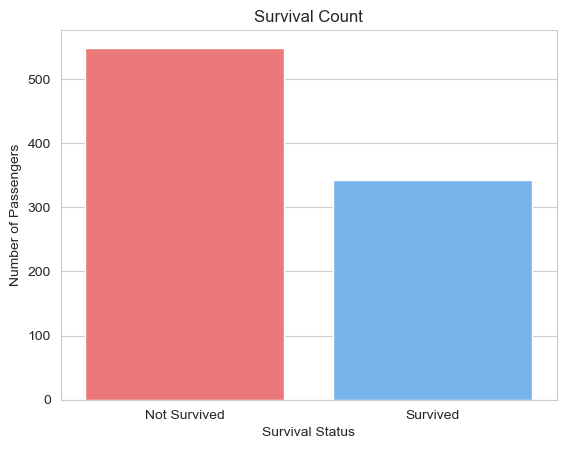

In [14]:
# สร้างคอลัมน์ใหม่ที่เข้าใจง่าย
df['Survival_Status'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# พล็อตกราฟแบบมีสี
sns.set_style("whitegrid")  # เพิ่มความสวยงาม
sns.countplot(x='Survival_Status', data=df, palette=['#FF6666', '#66B3FF'])

# ตั้งชื่อกราฟ
plt.title('Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.show()

### เปรียบเทียบ "อัตรารอดชีวิตเฉลี่ย" ของแต่ละเพศ

C:\Users\oat09\AppData\Local\Temp\ipykernel_32496\3620555238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')


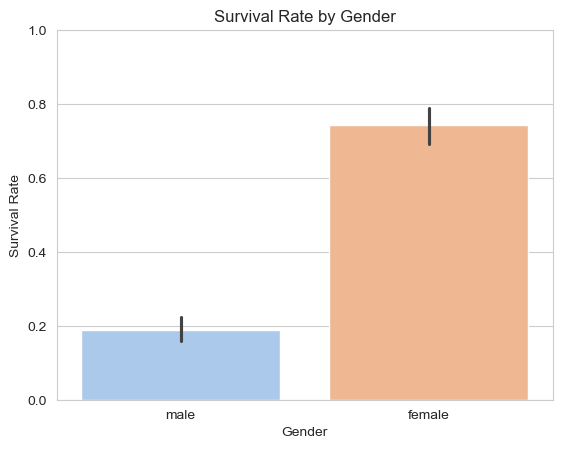

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) # ตั้งค่าขอบเขตแกน Y
plt.show()


### Survival Rate by Age Group

In [18]:
# สร้างช่วงอายุแบบ bucket
bins = [0, 12, 18, 30, 50, 80]
labels = ['เด็ก', 'วัยรุ่น', 'วัยทำงาน', 'วัยกลางคน', 'ผู้สูงอายุ']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

C:\Users\oat09\AppData\Local\Temp\ipykernel_32496\4112608843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette='Set2')


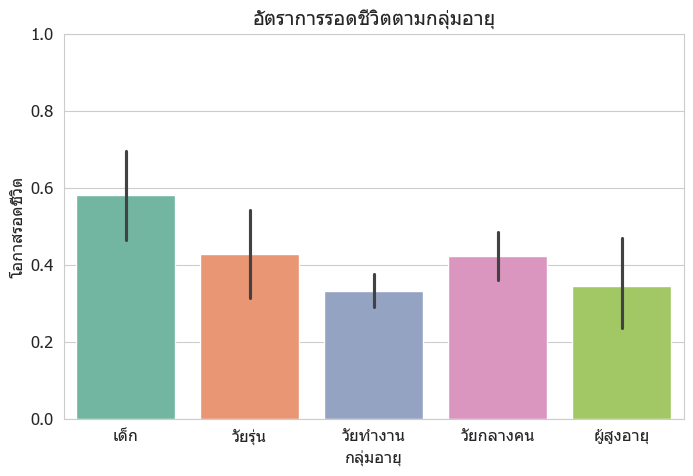

In [23]:
plt.rcParams['font.family'] = 'Tahoma'  # ตั้งค่าฟอนต์เป็น Tahoma
plt.rcParams['font.size'] = 12  # ตั้งค่าขนาดฟอนต์

plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='Survived', data=df, palette='Set2')
plt.title('อัตราการรอดชีวิตตามกลุ่มอายุ')
plt.ylabel('โอกาสรอดชีวิต')
plt.xlabel('กลุ่มอายุ')
plt.ylim(0, 1)
plt.show()

### คนที่มากับครอบครัวมีโอกาสรอดมากขึ้นไหม

In [24]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # รวมจำนวนสมาชิกในครอบครัว (รวมตัวเองด้วย)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int) # สร้างคอลัมน์ IsAlone เพื่อบอกว่าผู้โดยสารเดินทางคนเดียวหรือไม่


C:\Users\oat09\AppData\Local\Temp\ipykernel_32496\3776446175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsAlone', y='Survived', data=df, palette='pastel')


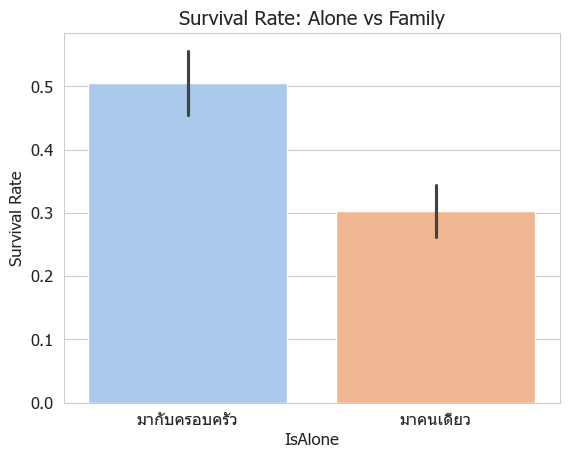

In [25]:
sns.barplot(x='IsAlone', y='Survived', data=df, palette='pastel')
plt.xticks([0,1], ['มากับครอบครัว', 'มาคนเดียว'])
plt.title('Survival Rate: Alone vs Family')
plt.ylabel('Survival Rate')
plt.show()


### ความสัมพันธ์ระหว่างท่าเรือขึ้นเรือกับการรอด

C:\Users\oat09\AppData\Local\Temp\ipykernel_32496\2960433765.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='Set3')


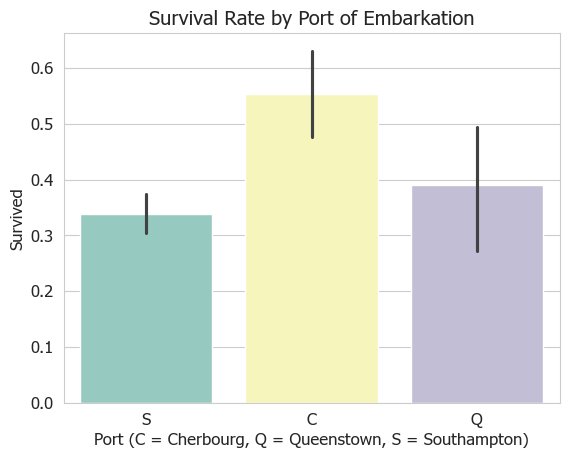

In [28]:
sns.barplot(x='Embarked', y='Survived', data=df, palette='Set3')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.show()


In [30]:
df.to_csv('data/titanic_cleaned.csv', index=False)


In [1]:
from IPython.display import Image, display

# dashboard power bi

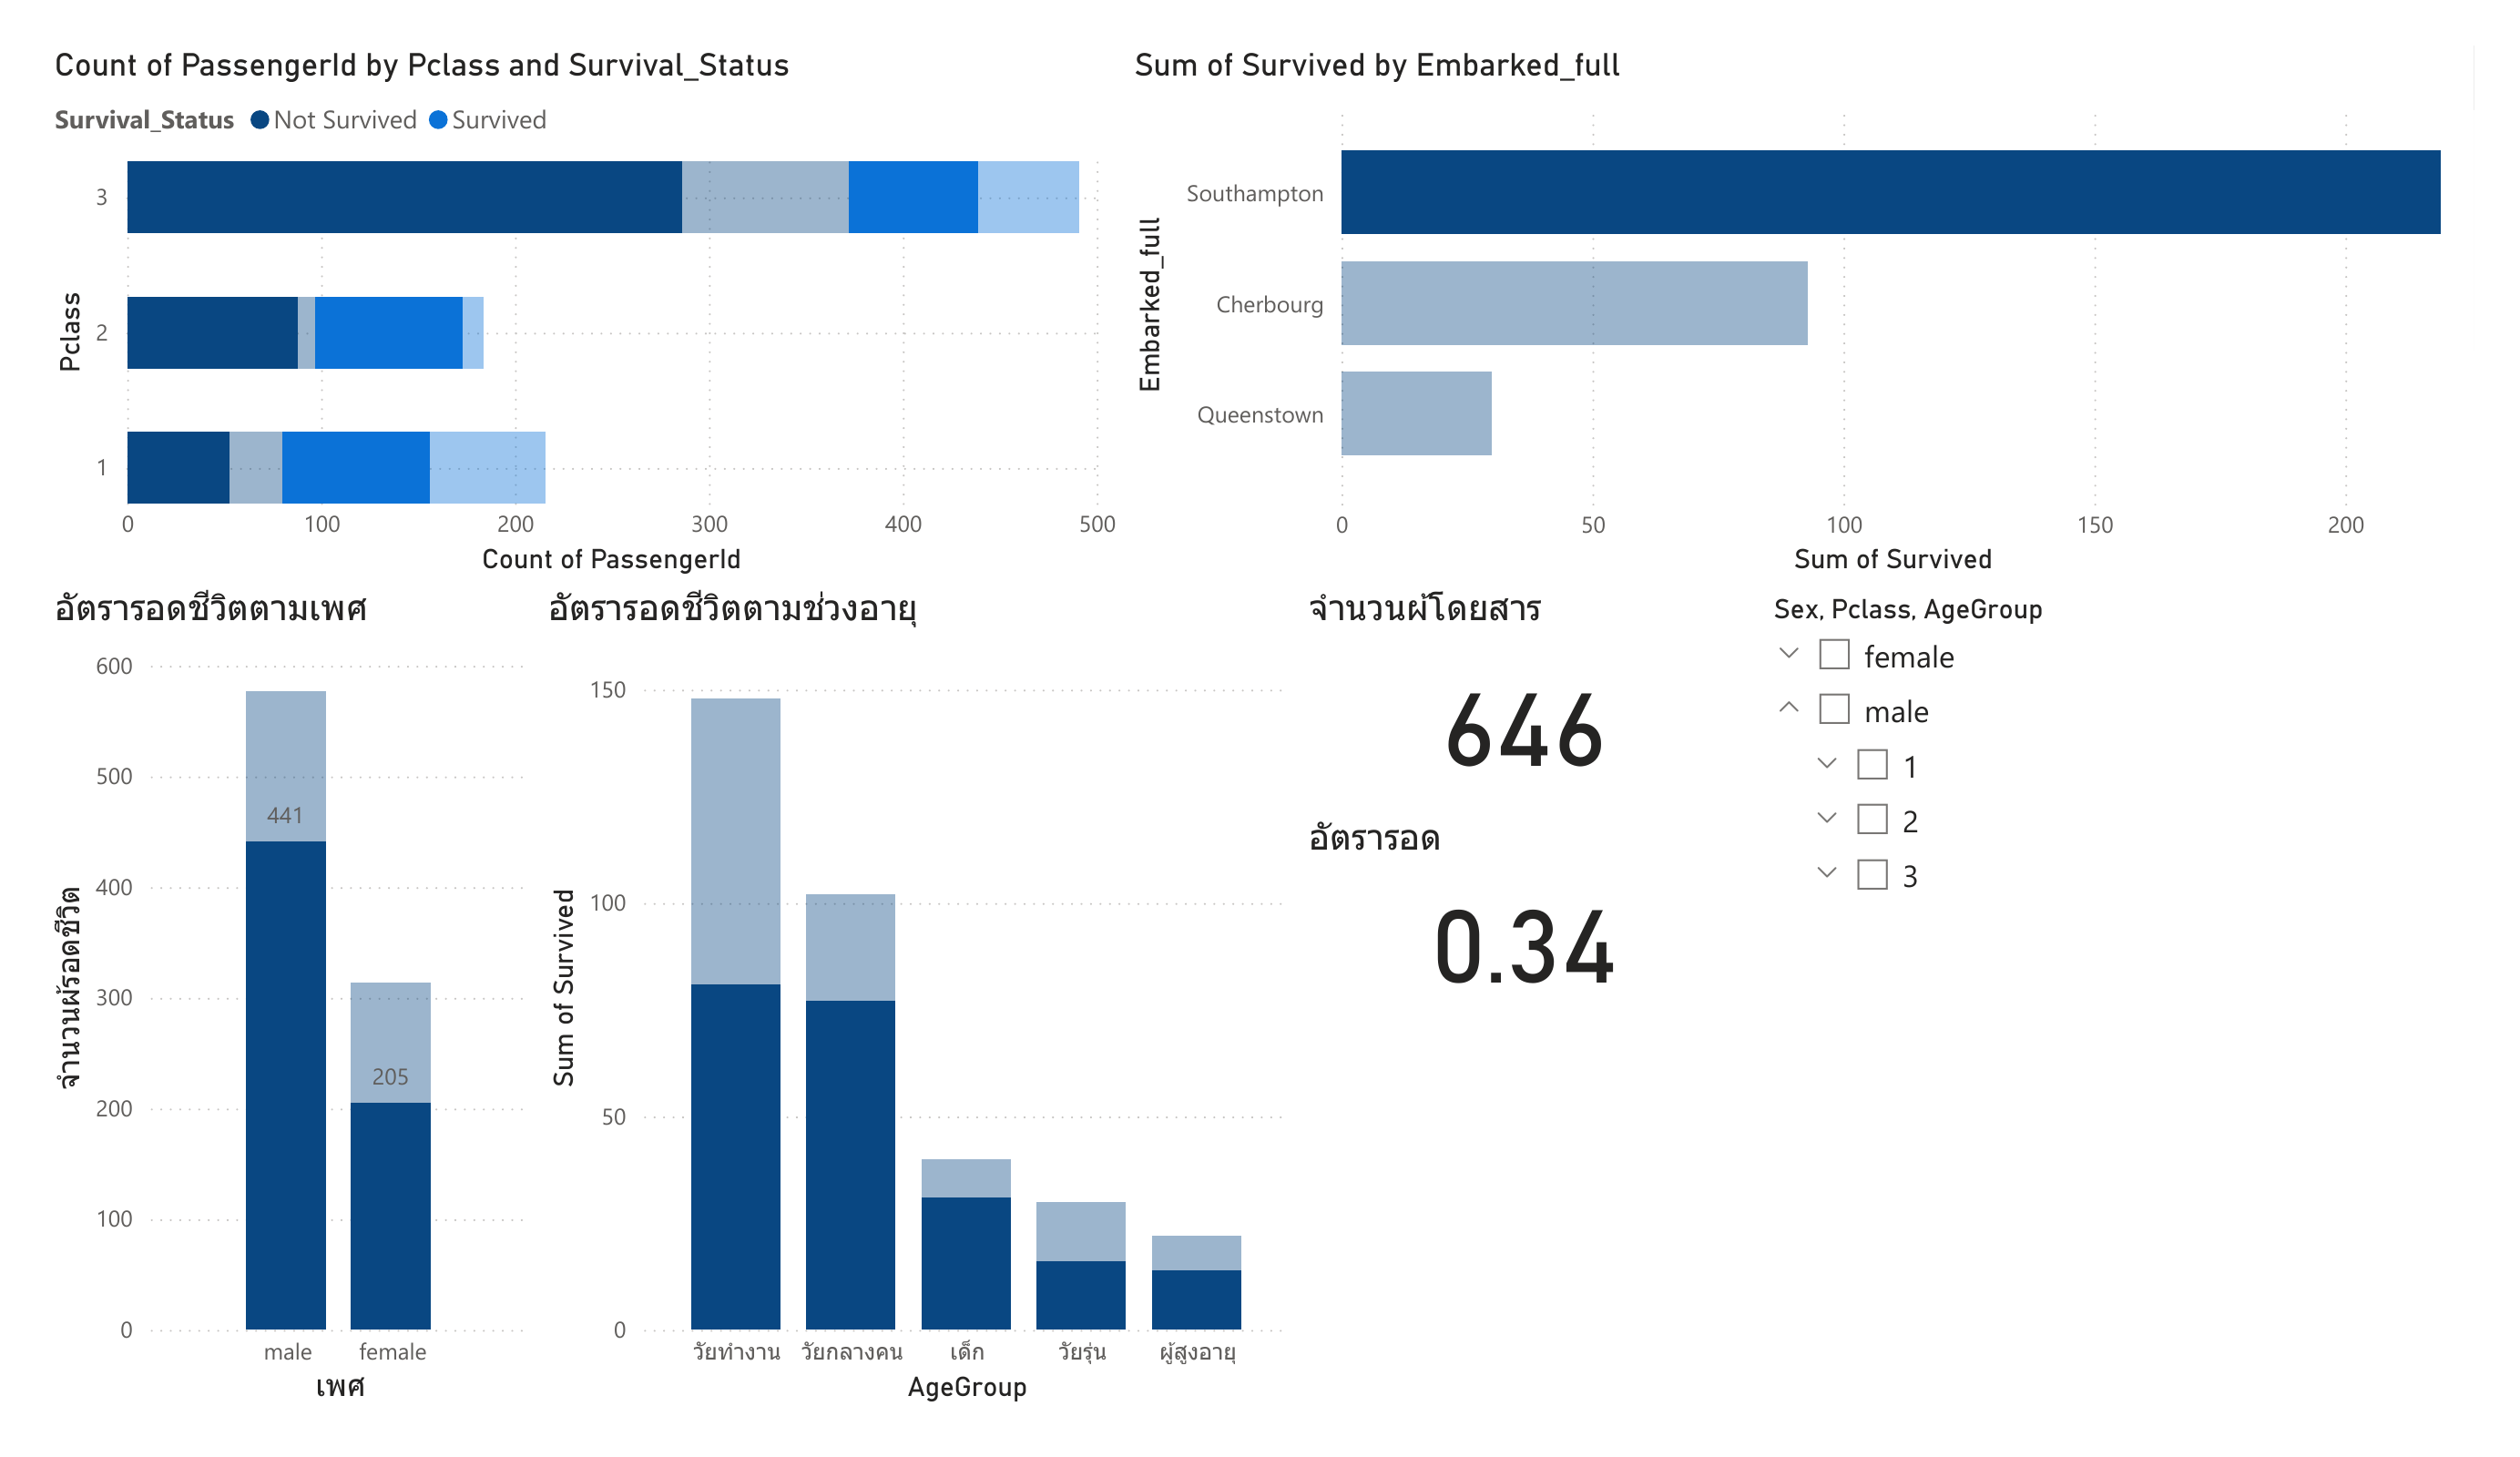

In [2]:
# แสดงภาพจาก path ที่กำหนด
image_path = 'dasss/page_1.png'
display(Image(filename=image_path))